In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline

# Set up runtime configuration parameters for matplotlib appearance
matplotlib.rcParams["figure.figsize"] = (16,8)

In [2]:
# Read the data
df = pd.read_csv("bengaluru_house_data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
# Return the dimensions (rows, columns) of the DataFrame 'df'
df.shape

(13320, 9)

In [4]:
# Retrive columns of the dataset
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
# Retrieve unique values in the 'area_type' column of the DataFrame 'df'
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
# Retrieve count of each values in the 'area_type' column of the DataFrame 'df'
df['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [7]:
# Drop features that are not required for prediction
df1 = df.drop(['area_type','society','balcony','availability'],axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
# No.of null values in each column
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
# Drop the null rows
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
# Return the dimensions (rows, columns) of the DataFrame 'df2'
df2.shape

(13246, 5)

In [11]:
# Return unique values from the 'size' column
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
# Extract number of bedrooms (BHK) from 'size' column and convert to integer
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\rakhe\AppData\Local\Temp\ipykernel_23728\1735674896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [13]:
# Retrieve unique values in the 'bhk' column of the DataFrame 'df2'
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
# Filter rows in df2 where the number of bedrooms (BHK) is greater than 10
df2[df2.bhk>10]

,location,size,total_sqft,bath,price,bhk
459,1 Giri Nagar,11 BHK,5000,9.0,360.0,11
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
1768,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,170.0,11
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
3853,1 Annasandrapalya,11 Bedroom,1200,6.0,150.0,11
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
4916,1Channasandra,14 BHK,1250,15.0,125.0,14
6533,Mysore Road,12 Bedroom,2232,6.0,300.0,12
7979,1 Immadihalli,11 BHK,6000,12.0,150.0,11


In [15]:
# Retrieve unique values in the 'total_sqft' column of the DataFrame 'df2'
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
# Function to check if a given input can be converted to a float
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
# Filter rows in df2 where 'total_sqft' is not a float value
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [18]:
# Function to convert sqft range to number
def convert_sqft_range_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None  

In [19]:
# Create a copy of df2 as df3, convert the 'total_sqft' column from range to numeric values, and display the first few rows
df3 = df2.copy()
df3.total_sqft = df3.total_sqft.apply(convert_sqft_range_to_num)
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [20]:
# Access row at index 30 in DataFrame 'df3'
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [21]:
# Create a copy of df3 as df4 and calculate price per square foot, then display the first few rows
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [22]:
# Rename columns for better understanding
# Rename columns 'price_per_sqft' to 'price_per_sqft_inr', 'price' to 'price_inr', and 'total_sqft' to 'total_sqft_inr'
df4.rename(columns={'price_per_sqft': 'price_per_sqft_inr', 
                    'price': 'price_inr'}, inplace=True)

In [23]:
# Display the first few rows of the DataFrame 'df4'
df4.head()

,location,size,total_sqft,bath,price_inr,bhk,price_per_sqft_inr
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
# Get the number of unique locations in the 'location' column of DataFrame 'df4'
len(df4['location'].unique())

1304

In [25]:
# Remove leading and trailing whitespace from the 'location' column and count occurrences, sorting in descending order
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [26]:
# Count the number of locations with occurrences less than or equal to 10 in location_stats
len(location_stats[location_stats<=10])

1052

In [27]:
# Filter and display locations with occurrences less than or equal to 10 from location_stats
location_stats_less_than_10 = location_stats[location_stats<=10]
print(location_stats_less_than_10)

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64


In [28]:
# Get the number of unique locations in the 'location' column of DataFrame 'df4'
len(df4.location.unique())

1293

In [29]:
# Replace locations with occurrences less than or equal to 10 with 'other' in the 'location' column of DataFrame 'df4'
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [30]:
# Get the number of unique locations in the 'location' column of DataFrame 'df4'
len(df4.location.unique())

242

In [31]:
# Display the first few rows of the DataFrame 'df4'
df4.head(10)

,location,size,total_sqft,bath,price_inr,bhk,price_per_sqft_inr
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [32]:
# Filter rows where the ratio of total_sqft to number of bedrooms (bhk) is less than 300 and display the first few entries
df4[df4.total_sqft/df4.bhk<300].head()

,location,size,total_sqft,bath,price_inr,bhk,price_per_sqft_inr
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [33]:
# Remove rows where the ratio of total_sqft to number of bedrooms is less than 300, and get the dimensions of the filtered DataFrame
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12502, 7)

In [34]:
# Get summary statistics for the 'price_per_sqft_inr' column in the DataFrame 'df5'
df5.price_per_sqft_inr.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft_inr, dtype: float64

In [35]:
# Remove outliers in price per square foot (pps) for each location and return a cleaned DataFrame 'df6'
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft_inr)
        st = np.std(subdf.price_per_sqft_inr)
        reduced_df = subdf[(subdf.price_per_sqft_inr>(m-st)) & (subdf.price_per_sqft_inr<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(10241, 7)

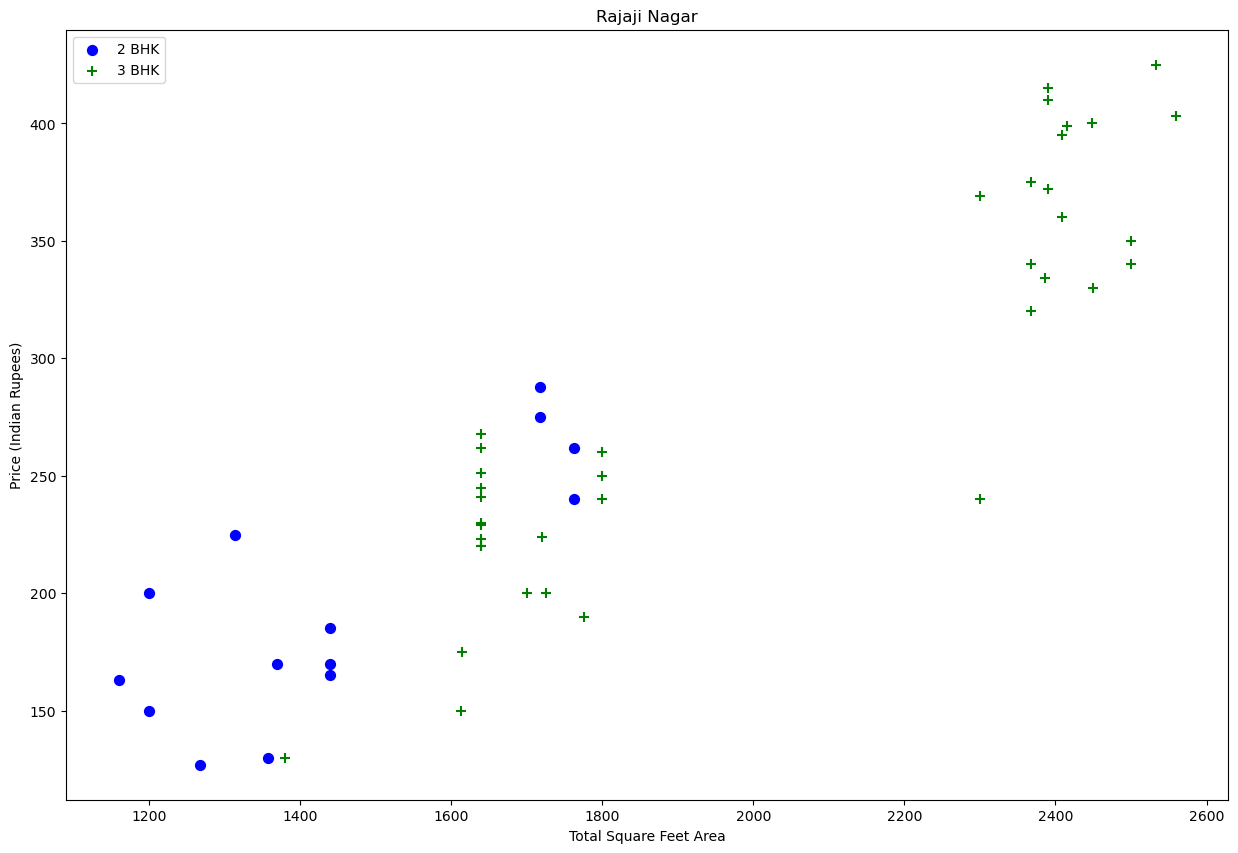

In [36]:
# Function to plot a scatter chart comparing prices of 2 BHK and 3 BHK properties in a specified location
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_inr,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_inr,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Indian Rupees)")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df6,"Rajaji Nagar")  

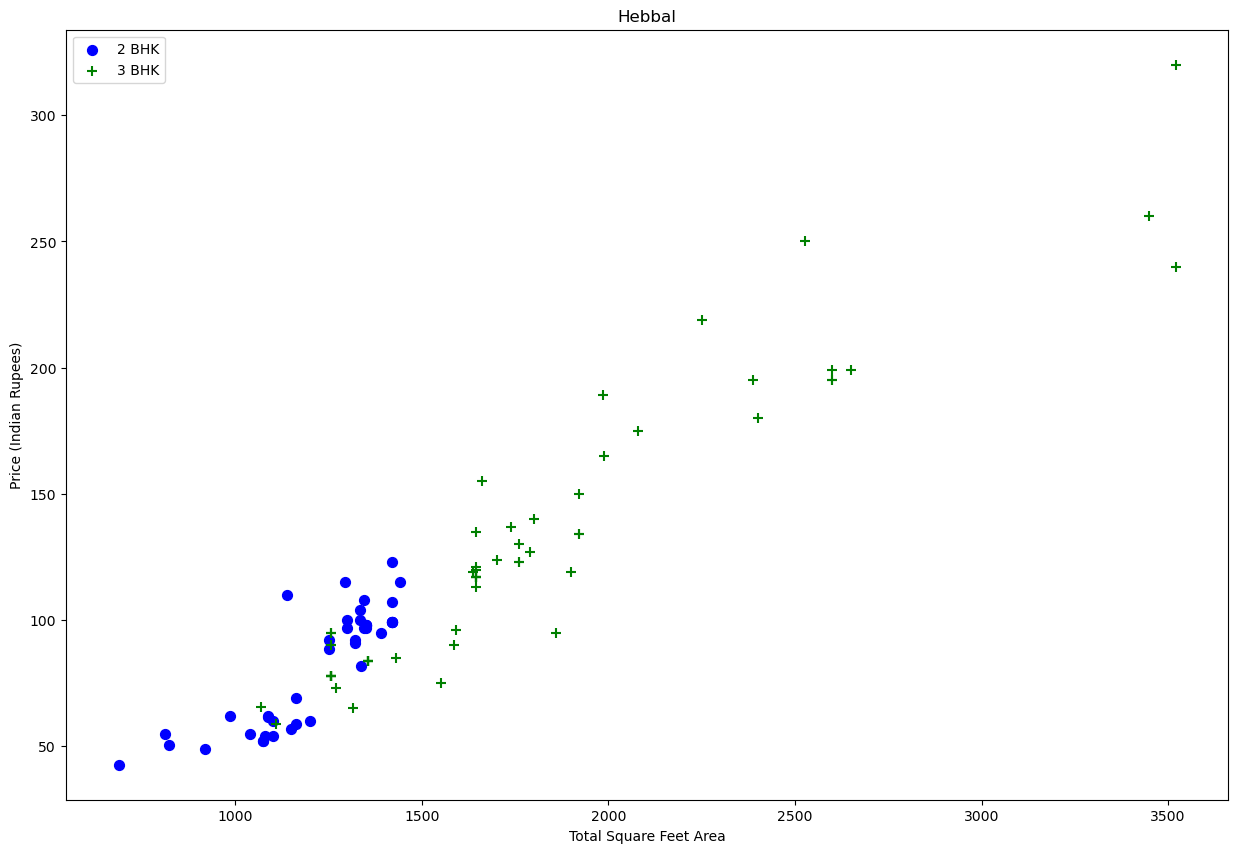

In [37]:
# Plot scatter chart for "Hebbal"
plot_scatter_chart(df6,"Hebbal")

In [38]:
# Remove BHK outliers based on price per square foot statistics for each location and return a cleaned DataFrame 'df7'
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft_inr),
                'std': np.std(bhk_df.price_per_sqft_inr),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft_inr<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
df7.shape

(7329, 7)

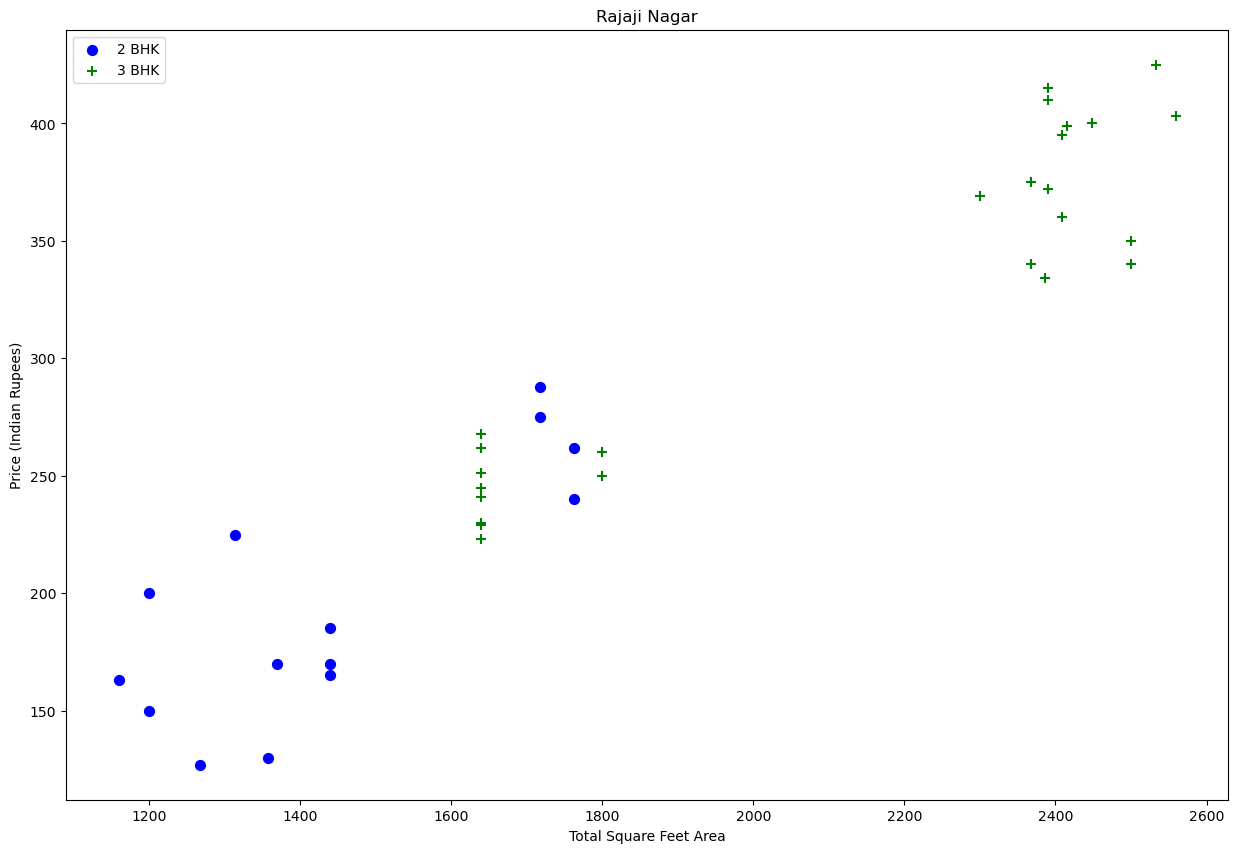

In [39]:
# Plot scatter chart for "Rajaji Nagar" and compare before outliers removal
plot_scatter_chart(df7,"Rajaji Nagar")  

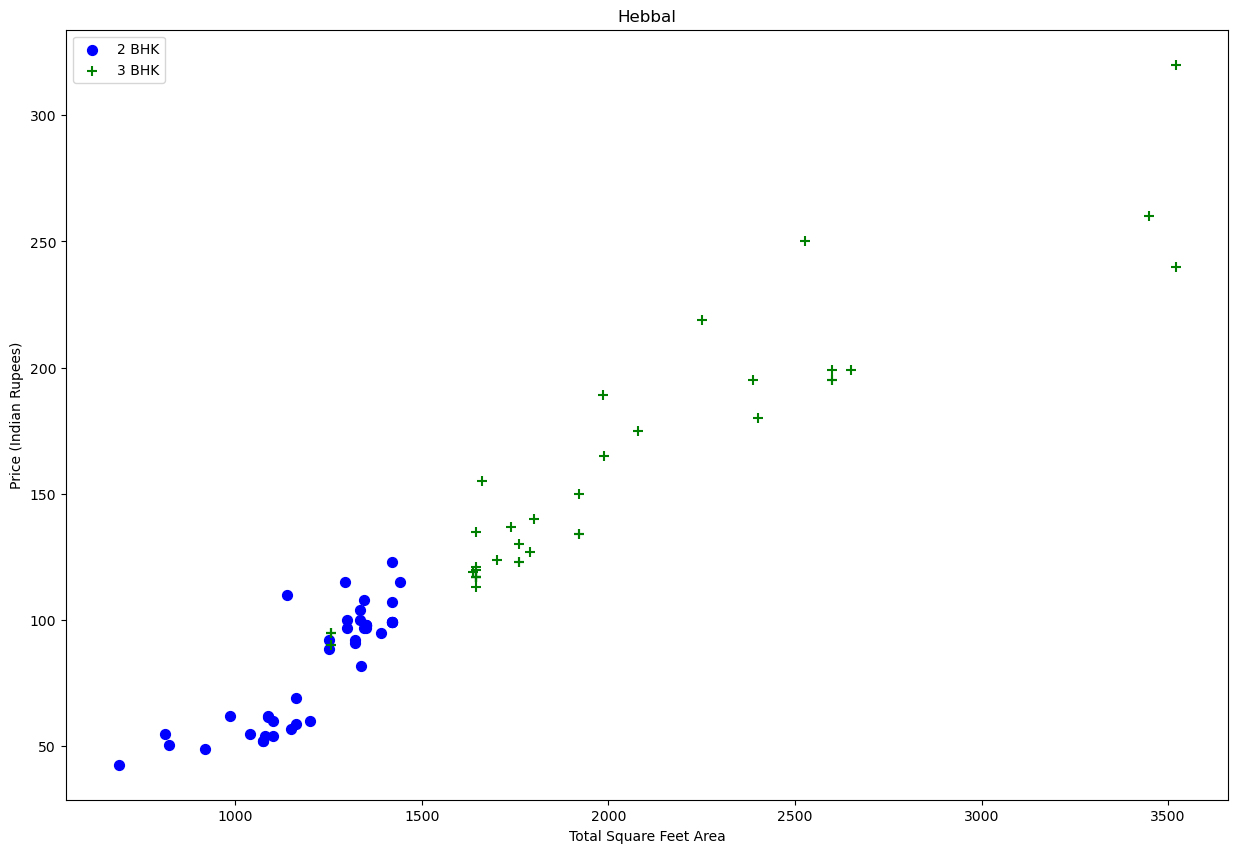

In [40]:
# Plot scatter chart for "Hebbal" and compare before outliers removal
plot_scatter_chart(df7,"Hebbal")  

Text(0, 0.5, 'Count')

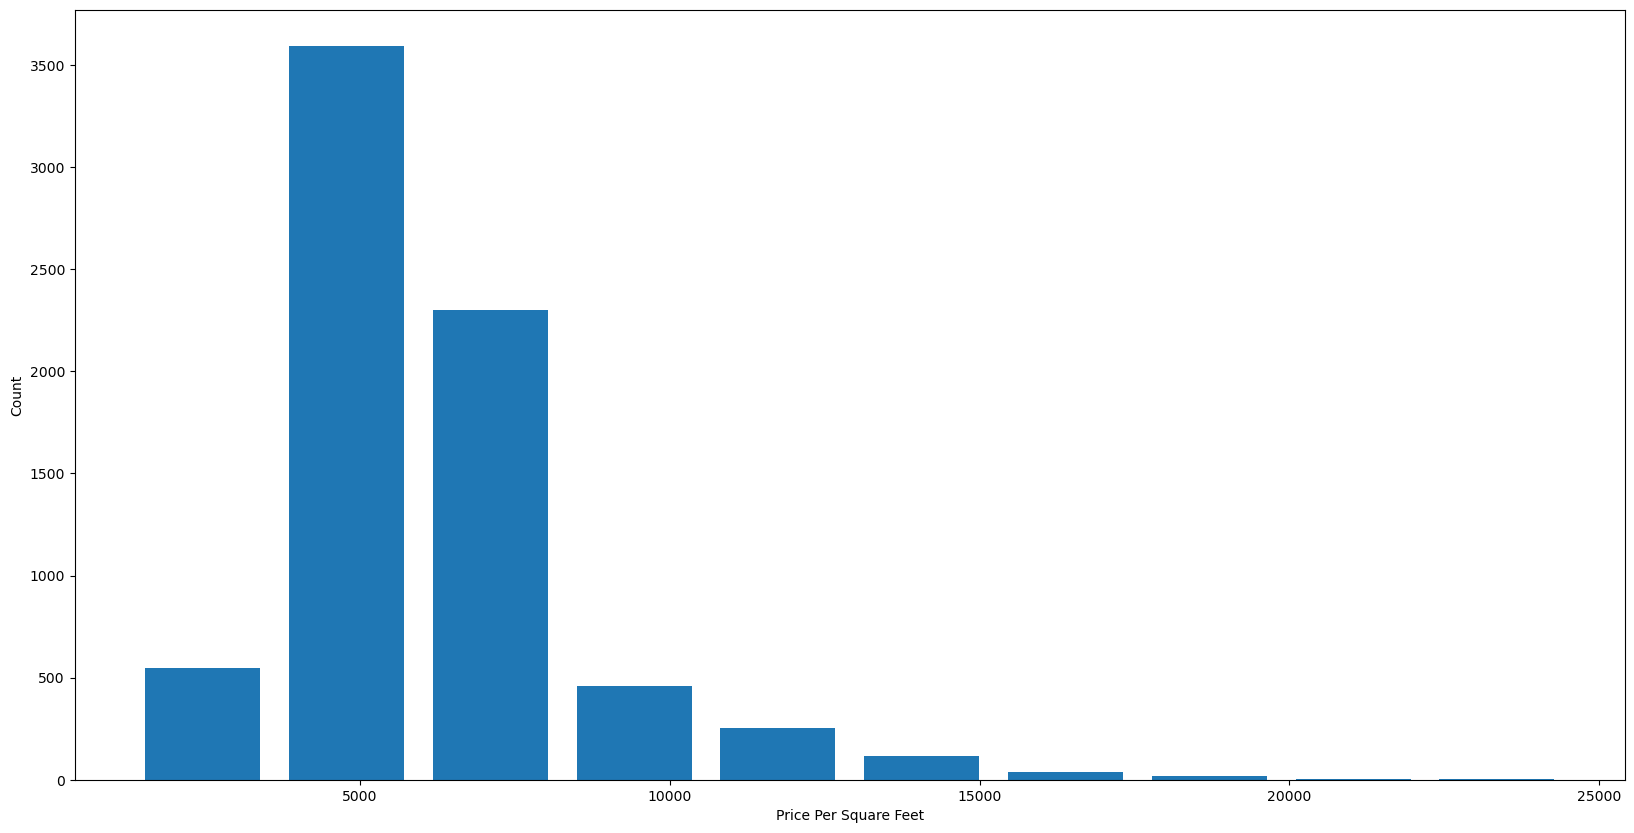

In [41]:
# Set the default figure size and create a histogram for the 'price_per_sqft_inr' column with specified width and axis labels
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft_inr,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [42]:
# Get the unique values in the 'bath' column of DataFrame 'df7'
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [43]:
# Filter rows in df7 where the number of bathrooms (bath) is greater than 10
df7[df7.bath>10]

,location,size,total_sqft,bath,price_inr,bhk,price_per_sqft_inr
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

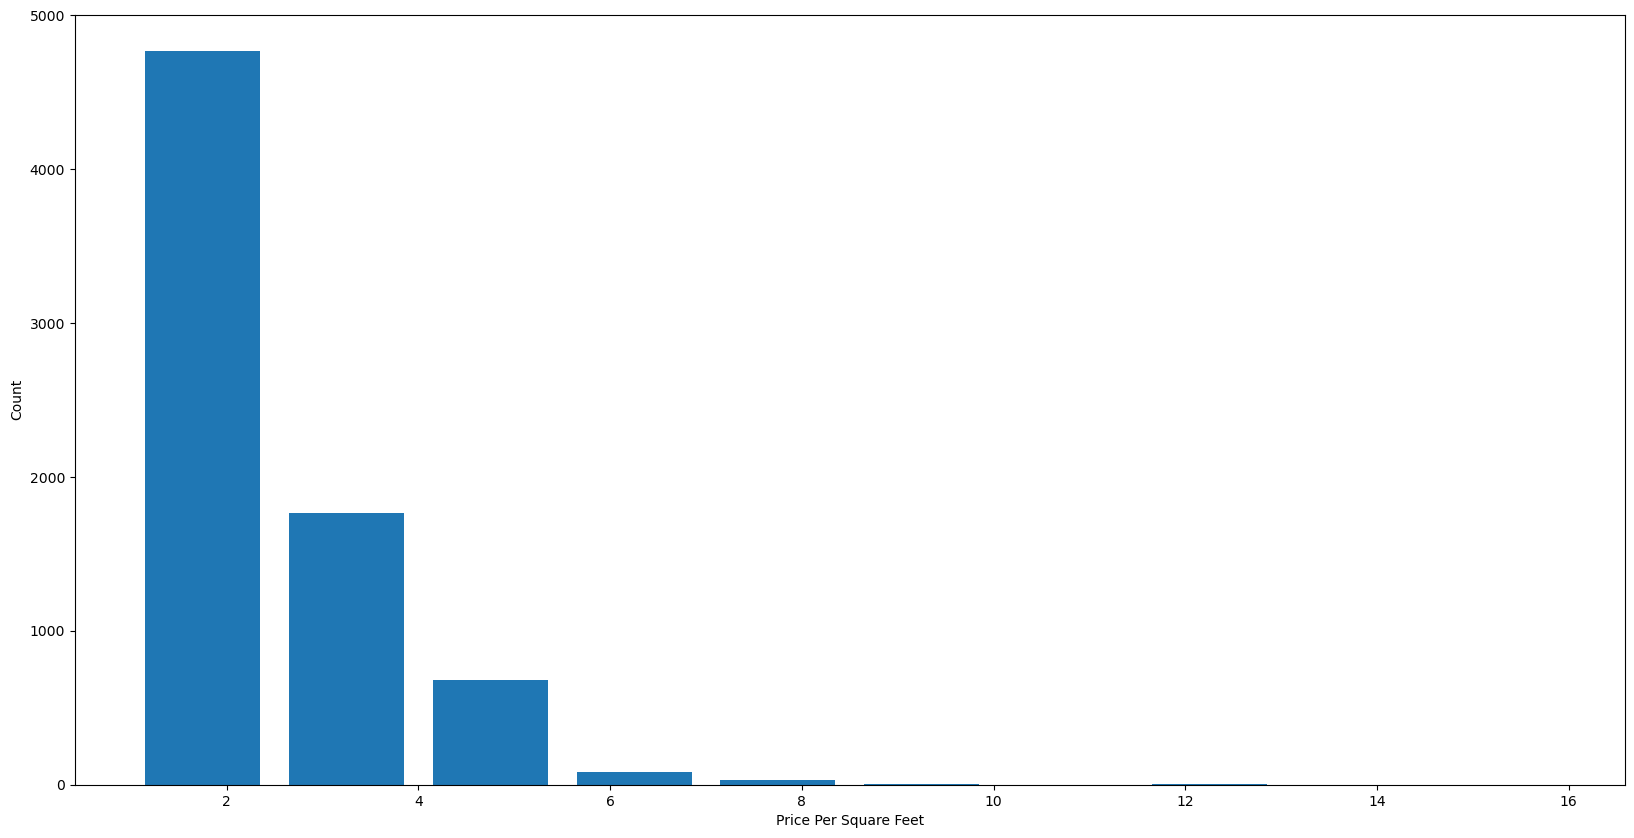

In [44]:
# Create a histogram of the 'bath' column with a specified bar width, and label the axes
plt.hist(df7.bath, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [45]:
# Filter rows in df7 where the number of bathrooms exceeds the number of bedrooms (BHK) plus 2
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,price_inr,bhk,price_per_sqft_inr
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [46]:
# Filter DataFrame 'df7' to include rows where the number of bathrooms is less than the number of bedrooms (BHK) plus 2
df8 = df7[df7.bath<df7.bhk+2]
df8.shape

(7251, 7)

In [47]:
# Create a new DataFrame df9 by dropping columns 'size' and 'price_per_sqft' from 'df8'
df9 = df8.drop(['size','price_per_sqft_inr'], axis='columns')
df9.head()

,location,total_sqft,bath,price_inr,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [48]:
# Create dummy variables for the 'location' column in DataFrame 'df9'
dummies = pd.get_dummies(df9.location)
dummies = dummies.astype(int)
dummies.head(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df10 = pd.concat([df9, dummies.drop('other', axis = 'columns')], axis = 'columns')
df10.head()

,location,total_sqft,bath,price_inr,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# Drop the 'location' column from DataFrame 'df10' and store the result in 'df11'
df11 = df10.drop('location', axis = 'columns')
df11.head()

,total_sqft,bath,price_inr,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# Return the dimensions (rows, columns) of the DataFrame 'df11'
df11.shape

(7251, 245)

In [52]:
# Create feature set X by dropping the 'price' column from DataFrame 'df11'
X = df11.drop('price_inr', axis = 'columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# Extract the target variable 'price' from DataFrame 'df11' and display the first few values
y = df11.price_inr
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price_inr, dtype: float64

In [54]:
# Split the dataset into training and testing sets with 80% training data and 20% testing data, using a random state of 10 for reproducibility
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [55]:
# Train a Linear Regression model on the training data and evaluate its performance on the test data
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8452277697874322

In [56]:
# Perform cross-validation using ShuffleSplit with 5 splits, 20% test size, and evaluate using Linear Regression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [57]:
# Perform GridSearchCV to find the best model and hyperparameters for linear regression, lasso, and decision tree algorithms
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X, y)

,model,best_score,best_params
0,linear_regression,0.819001,"{'fit_intercept': False, 'positive': False}"
1,lasso,0.687478,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.718899,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [58]:
# Predict the price using the trained linear regression model (lr_clf) based on location, square feet area, number of bathrooms, and number of bedrooms (BHK)
def predict_price(location, sqft, bath, bhk):    
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [59]:
import warnings
warnings.filterwarnings("ignore")

In [60]:
# Predict the price for a property
predict_price('1st Phase JP Nagar', 1000, 2, 2)

83.49904677185269

In [61]:
# Predict the price for a property
predict_price('1st Phase JP Nagar', 1000, 3, 3)

86.80519395211932

In [62]:
# Predict the price for a property
predict_price('Indira Nagar', 1000, 2, 2)

181.27815484006732

In [63]:
# Predict the price for a property
predict_price('Indira Nagar',1000, 3, 3)

184.58430202033395

In [64]:
# Export the tested model to a pickle file
import pickle
with open('banglore_house_data_model.pickle', 'wb') as file:
    pickle.dump(lr_clf, file)

In [65]:
# Export location and column information to a file that will be useful later on in our prediction application
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json", "w") as file:
    file.write(json.dumps(columns))